# Fourier Coefficients: Period $\to$ Aperiodic

## As $T_0$ increases the $\omega$ gap shrinks

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib inline

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()
    
Kbase = 4 # scaling used in plotting

## Plotting functions

In [2]:
def compute_ck(T0,xftn):
    omega0 = 2*np.pi/T0
    tt = np.arange(-T0/2, T0/2, 1/10000)  # the time samples
    x2 = lambda t,k: np.exp(-1j*k*omega0*t)  
    prod = lambda t,k: xftn(t) * x2(t,k)/T0

    Cvalues = np.zeros((2*KK+1,1),dtype = 'complex_')
    for kk in Krange:
        Cvalues[KK+kk] = scipy.integrate.simps(prod(tt,kk), tt)

    return Cvalues

def plot_fourier_coeffs(T0,x,Cvals):
    omega0 = 2*np.pi/T0
    plot_tt = np.arange(-3*T0, 3*T0, 1/100)  # the time samples
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8), dpi=150)
    ax1.plot(plot_tt, x(plot_tt), 'k-', lw=2)
    ax1.set_title('Function')
    ax1.set_ylabel('$x(t)$')
    ax1.set_xlabel('$t$')
    nicegrid(ax1)
    
    markerline, stemlines, baseline = ax2.stem(Krange*omega0, T0*Cvals.real, 'b-',use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 3)
    plt_omega = np.arange(min(Krange*omega0),max(Krange*omega0),1/1000)
    ax2.plot(plt_omega,np.sinc(plt_omega/2/np.pi),'r--')
    ax2.set_xlabel('$\omega$')
    ax2.set_title('Fourier Coefficients')
    ax2.set_ylabel('$T_0 c_k $')
    ax2.set_ylim(-0.4,1.25)
    ax2.text(-3*T0*omega0,0.8,'$\omega_0=2\pi/$'+str(T0))
    ax2.set_xticks((-2*T0*omega0,-T0*omega0,0,T0*omega0,2*T0*omega0)) 
    ax2.set_xticklabels(['-'+str(2*T0)+'$\omega_0$','-'+str(T0)+'$\omega_0$',0,str(T0)+'$\omega_0$',str(2*T0)+'$\omega_0$'])
    plt.tight_layout()
    nicegrid(ax2)
    plt.show()
    

## Fourier Coeffs for Square Wave with various periods  

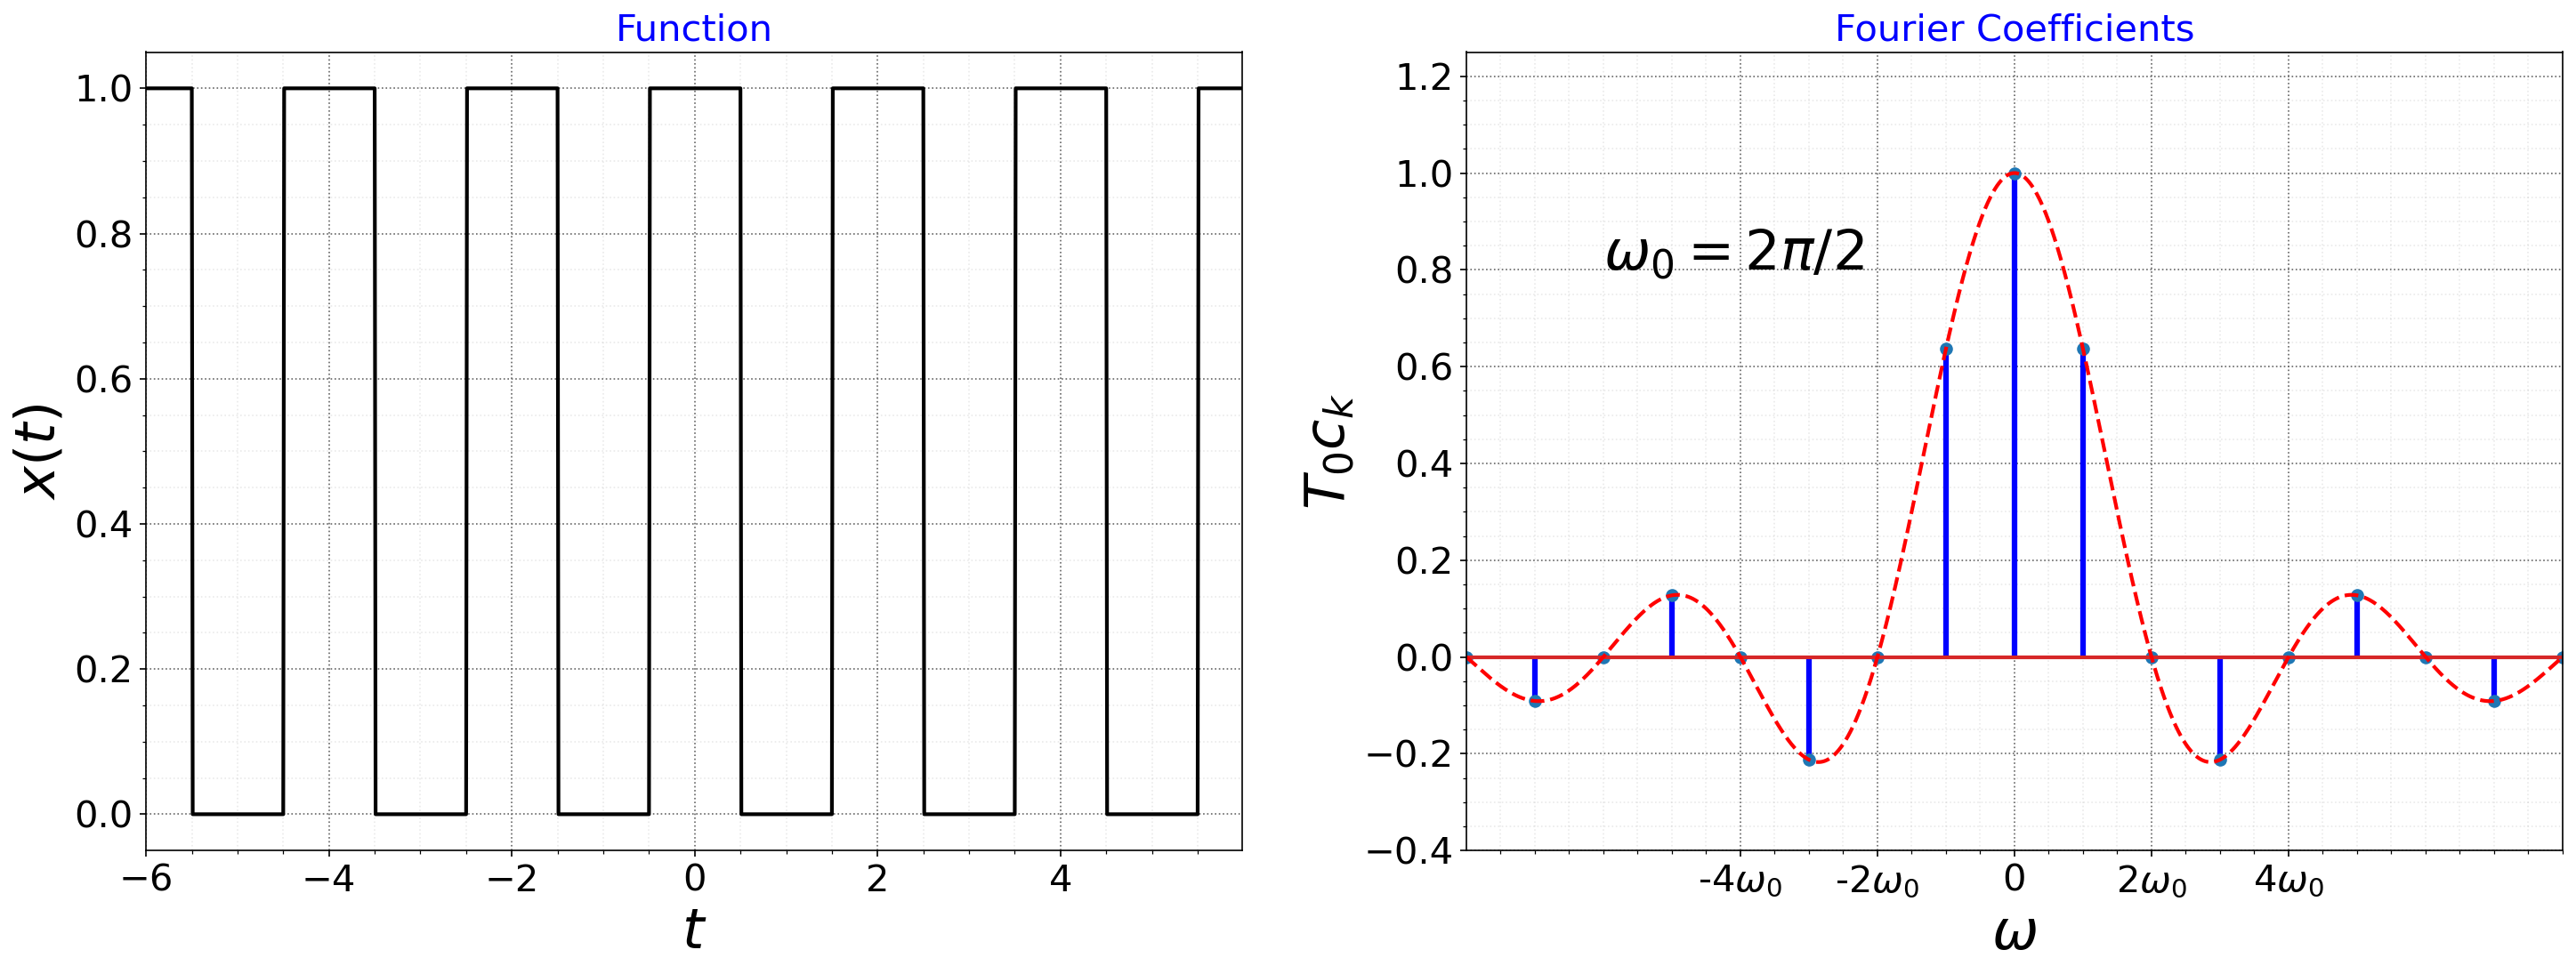

In [3]:
T0 = 2
KK = Kbase * T0
Krange = np.arange(-KK,KK+1,1)

x4 = lambda t: (1+signal.square(2*np.pi*(t+1/2)/T0,1/T0))/2  
C_ex4 =compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4)   

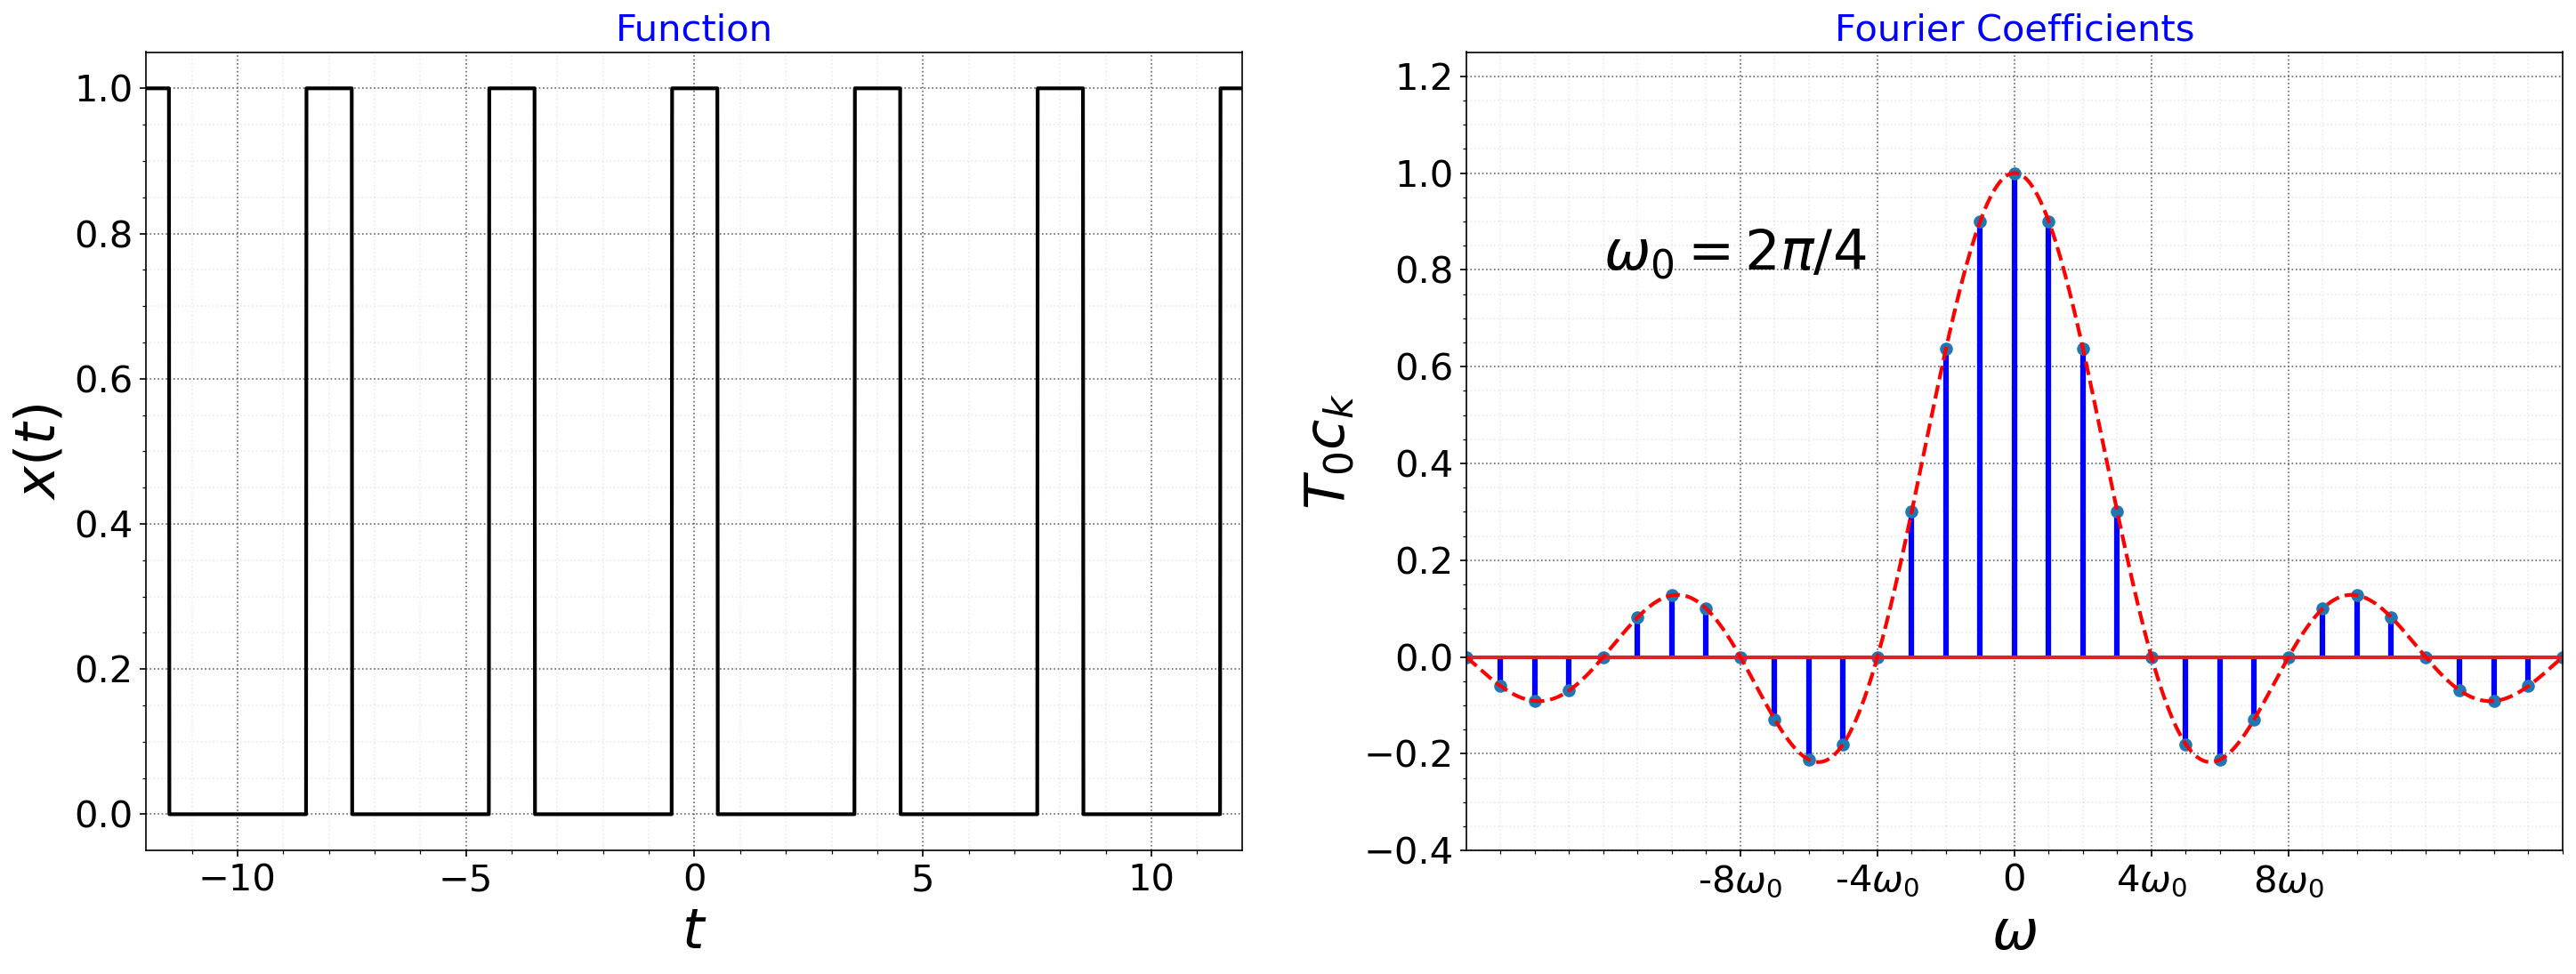

In [4]:
T0 = 4
KK = Kbase * T0
Krange = np.arange(-KK,KK+1,1)

x4 = lambda t: (1+signal.square(2*np.pi*(t+1/2)/T0,1/T0))/2  
C_ex4 =compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4)   

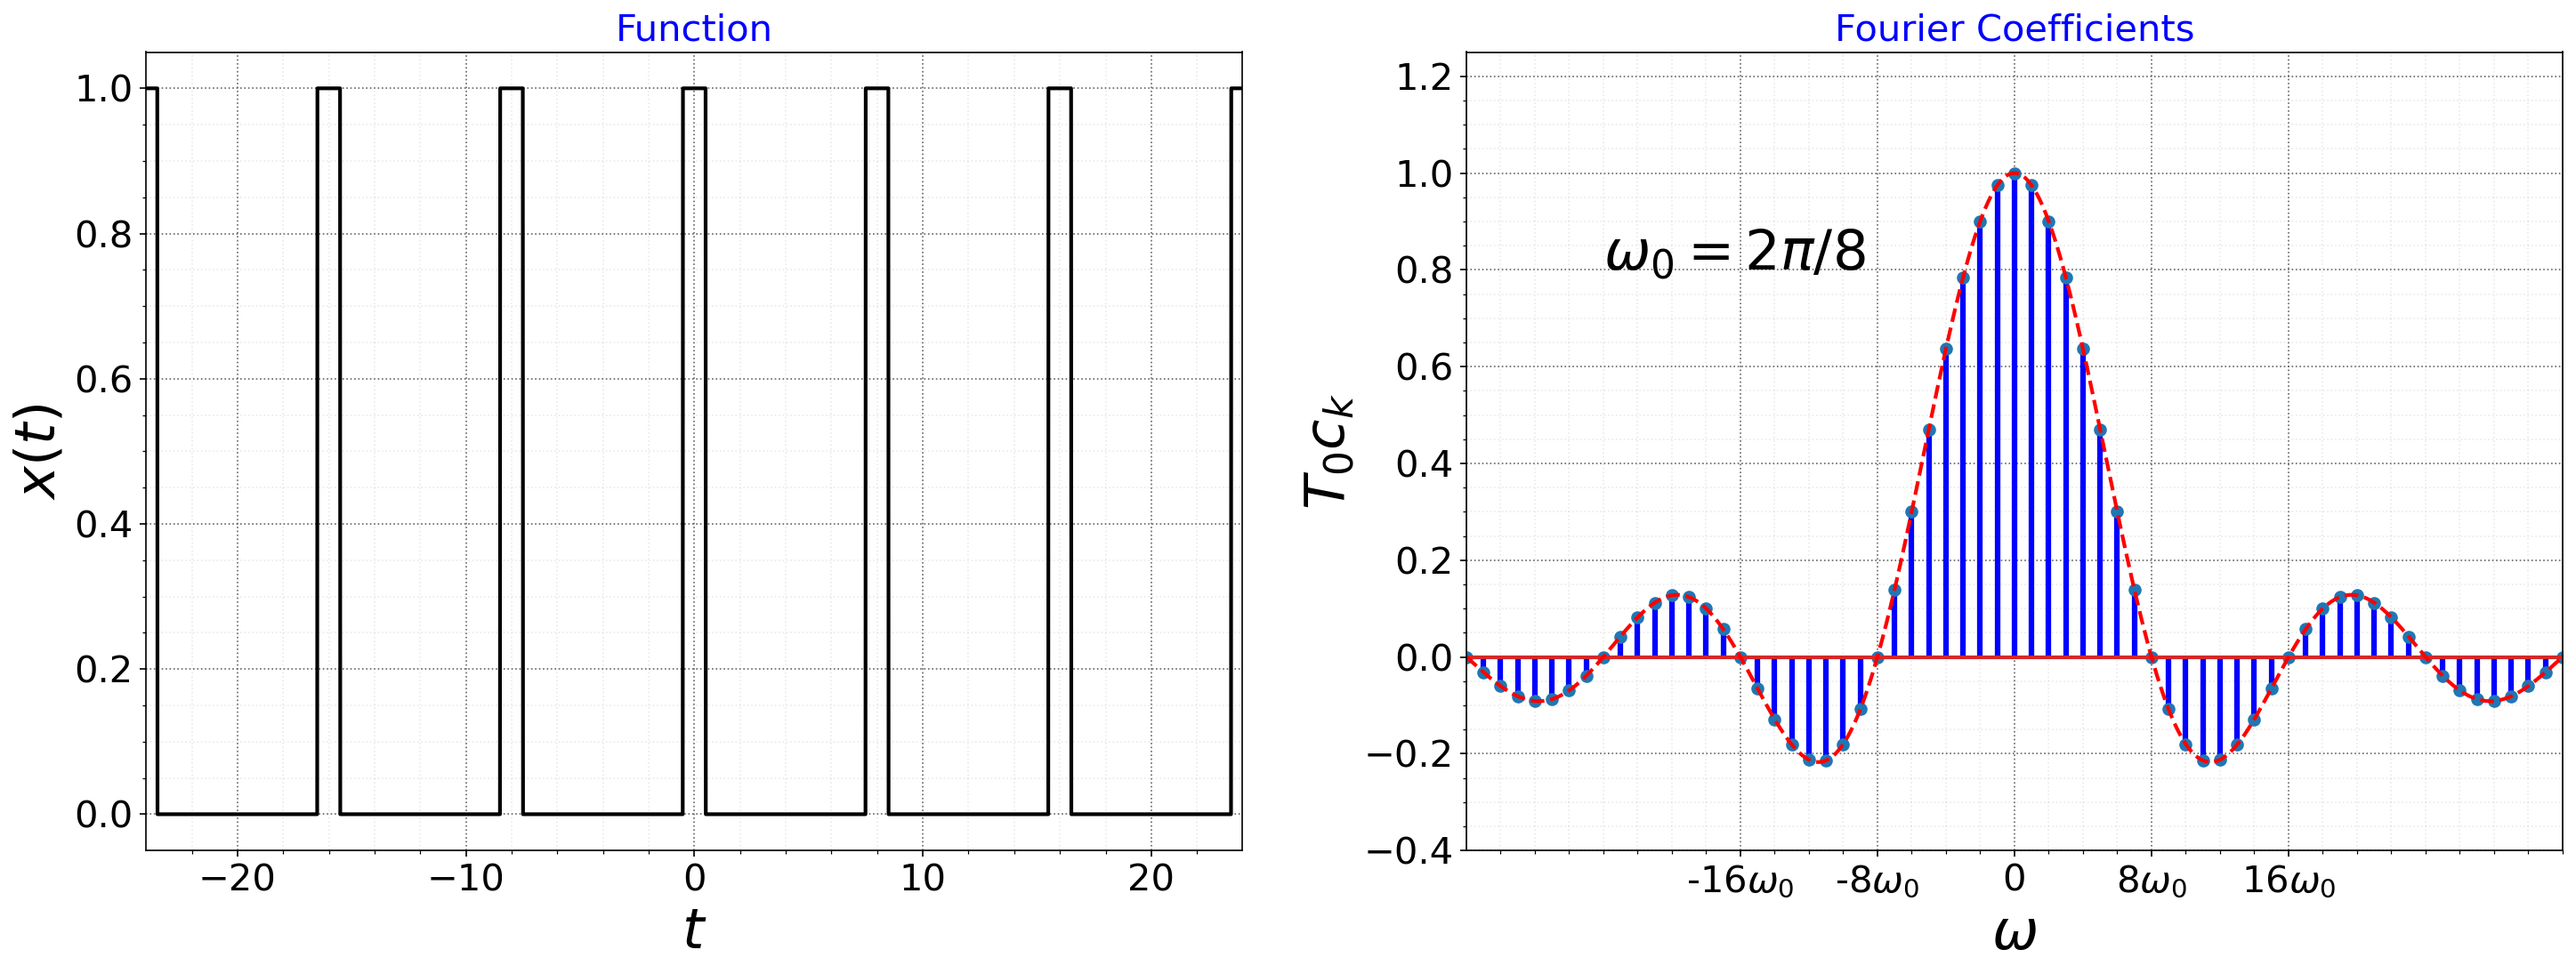

In [5]:
T0 = 8
KK = Kbase * T0
Krange = np.arange(-KK,KK+1,1)

x4 = lambda t: (1+signal.square(2*np.pi*(t+1/2)/T0,1/T0))/2  
C_ex4 =compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4) 

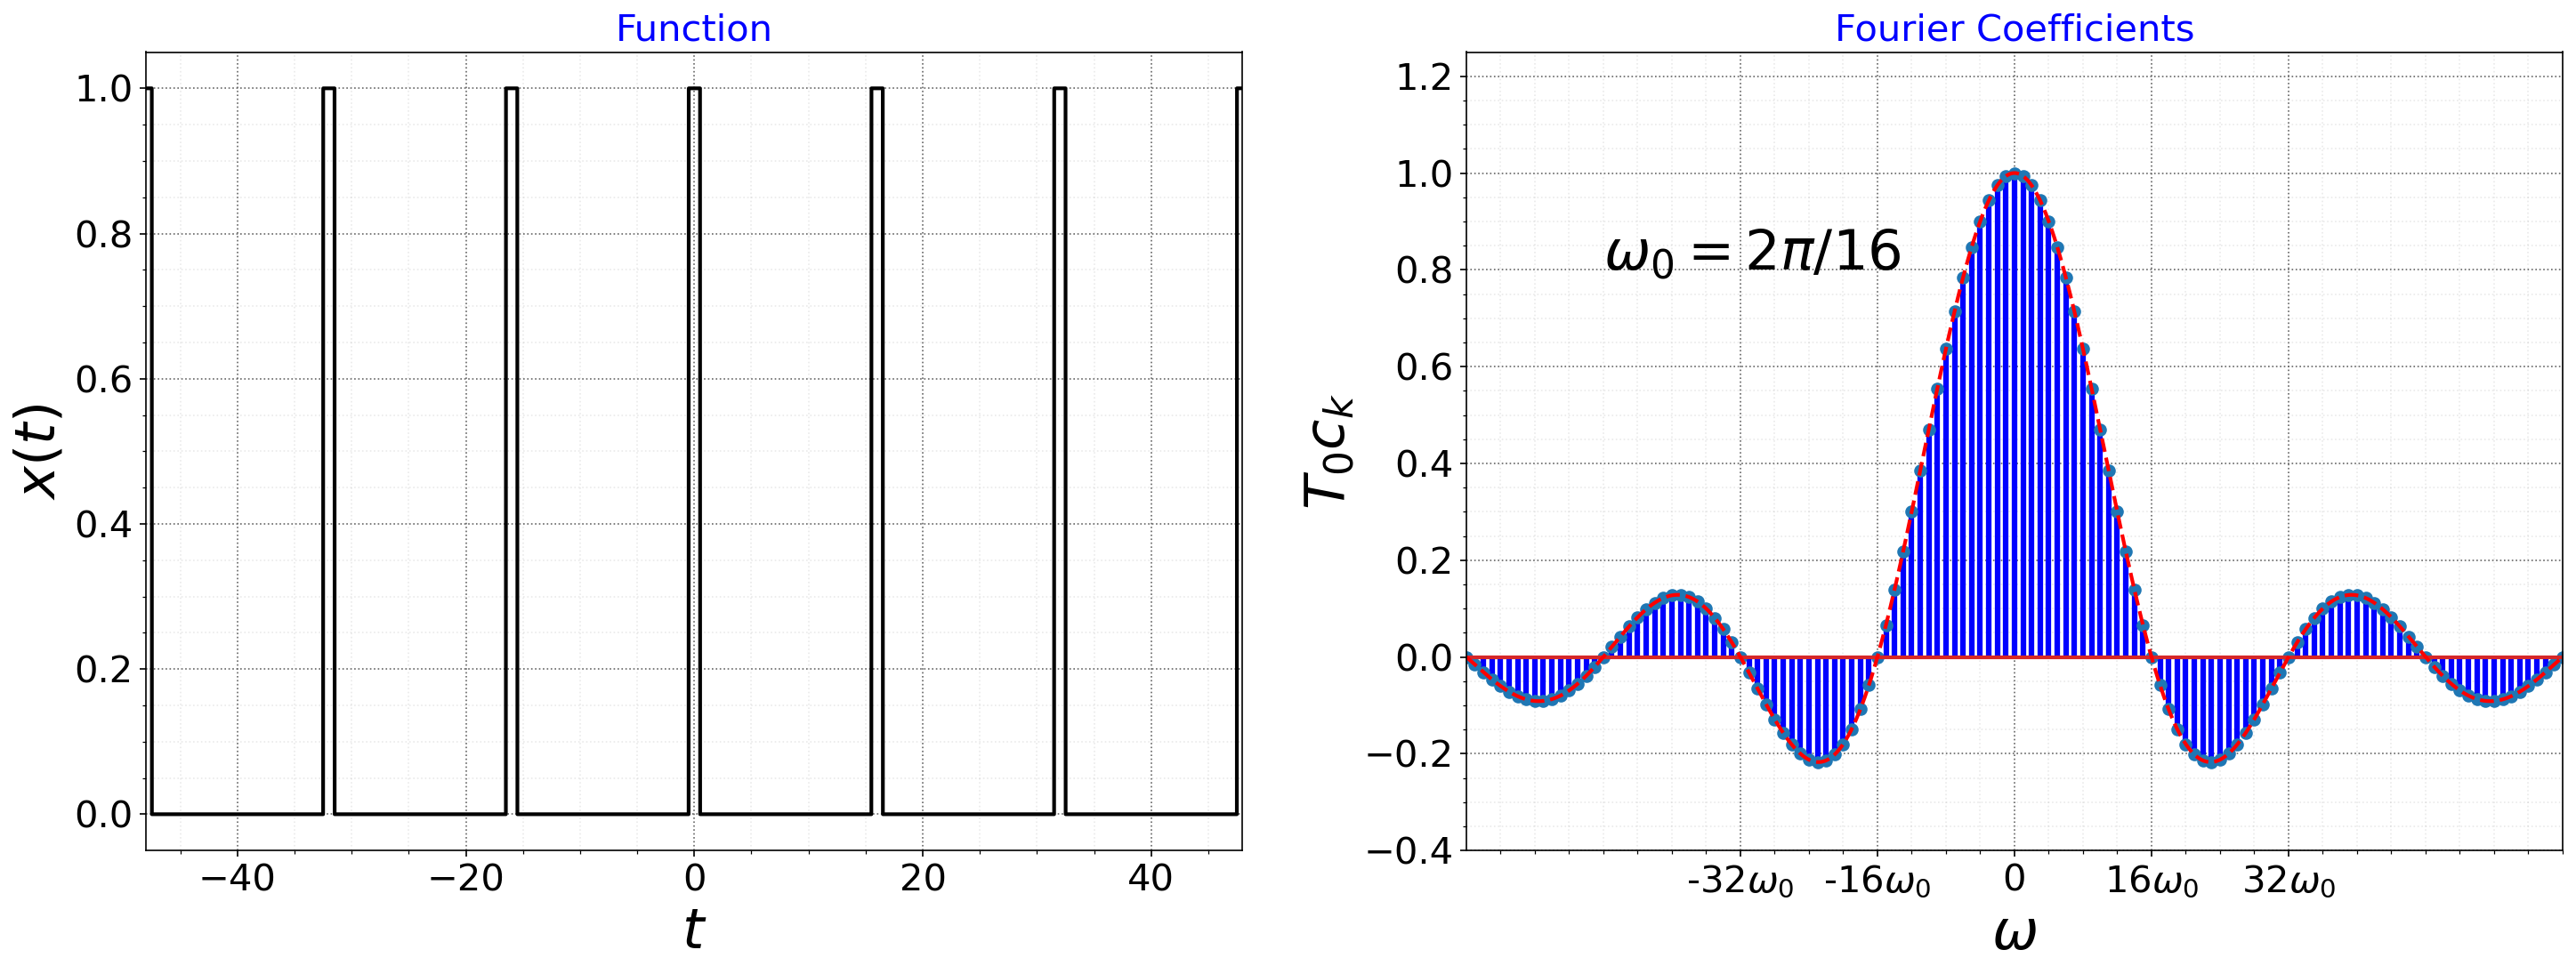

In [6]:
T0 = 16
KK = Kbase * T0
Krange = np.arange(-KK,KK+1,1)

x4 = lambda t: (1+signal.square(2*np.pi*(t+1/2)/T0,1/T0))/2  
C_ex4 =compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4)   

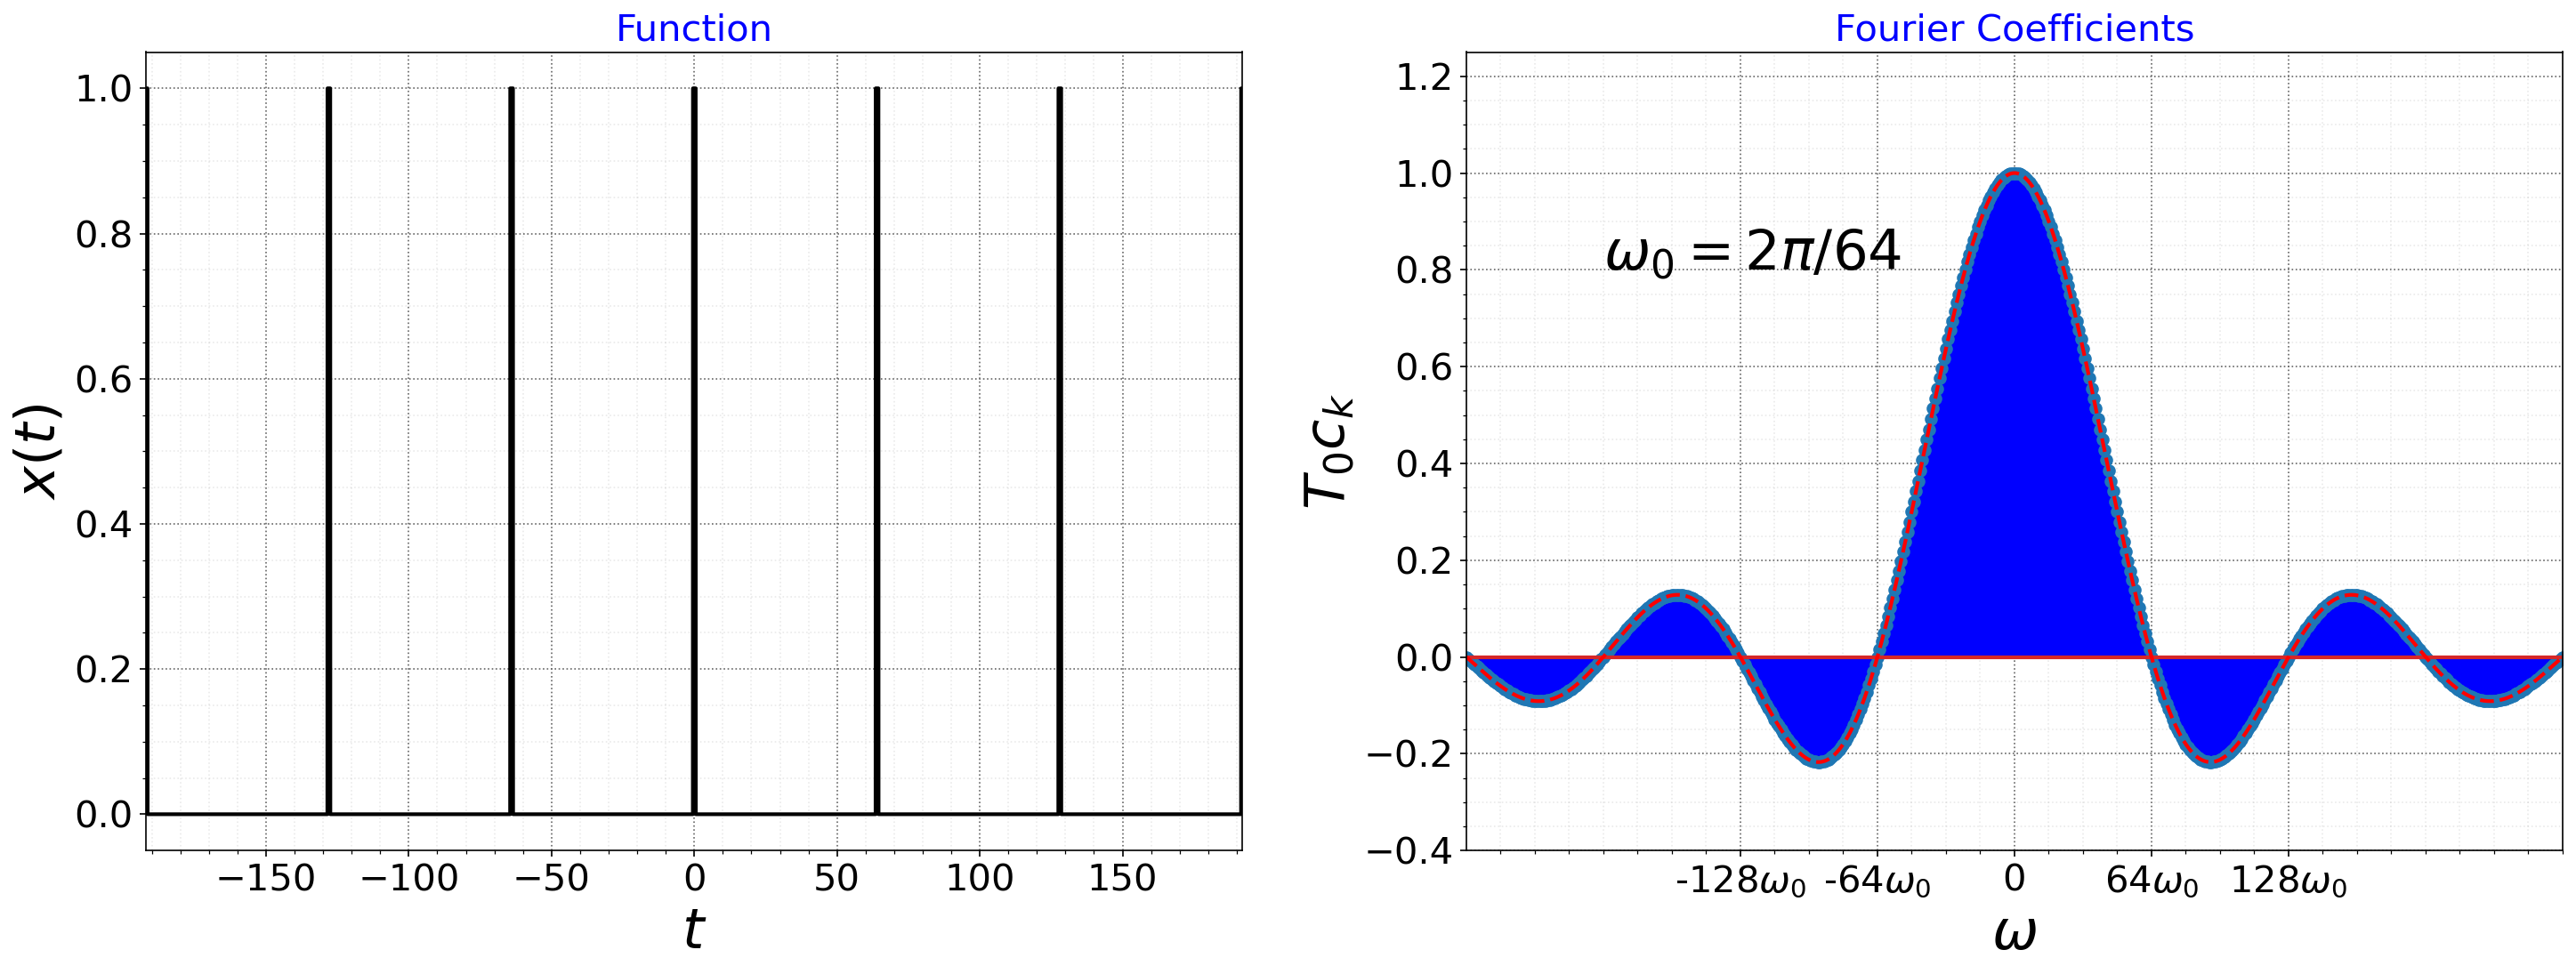

In [7]:
T0 = 64
KK = Kbase * T0
Krange = np.arange(-KK,KK+1,1)

x4 = lambda t: (1+signal.square(2*np.pi*(t+1/2)/T0,1/T0))/2  
C_ex4 =compute_ck(T0,x4)
plot_fourier_coeffs(T0,x4,C_ex4) 